# Simulating a synapse in brian2

In [1]:
%matplotlib inline
import brian2 as br
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create 200x2 array of zeros
# each column in this array will be input for a different neuron
input_current = np.zeros((200,2))
input_current[50:65, 0] = 200

# convert numpy array to timed array
input_current = br.TimedArray(input_current*br.pamp, dt=1*br.ms)

In [3]:
def run_synapse(input_current, tau_decay=2*br.ms, E_syn=0*br.mV):
    # define parameters of the LIF model
    R = 100 * br.Mohm  # membrane resistance
    tau = 10 * br.ms  # membrane time constant
    thr = -50 * br.mV  # spike threshold
    u_rest = -65 * br.mV  # resting potential
    u_r = -70 * br.mV  # reset potential
    
    # define parameters of the synapse model
    g_jump = 10 * br.nsiemens  # jump in conductivity after a presynaptic spike

    # define equation for the LIF model
    # and equation for the synapse model
    eqs = '''
    du/dt = ( -(u - u_rest) + R*I - R*I_syn ) / tau : volt
    I = input_current(t,i) : amp
    I_syn = g_syn*(u - E_syn): amp
    dg_syn/dt = -g_syn / tau_decay : siemens
    '''

    # create neuron group
    br.start_scope()
    LIF = br.NeuronGroup(2, eqs, threshold='u>thr', reset='u=u_r', method='euler')

    # set membrane to resting potential
    LIF.u[:] = u_rest

    # create synapse
    S = br.Synapses(LIF, on_pre='g_syn += g_jump')
    S.connect(i=0, j=1)

    # indicate what to record
    rec = br.StateMonitor(LIF, ('I', 'u', 'I_syn', 'g_syn'), record=True)

    # run the simulation for 200 ms
    br.run(200 * br.ms)
    
    # Plot membrane potential against time for LIF neurons.
    fig, ax = plt.subplots()
    ax.plot(rec.t/br.ms, rec.u[0]*1000, 'b--', label='Pre', lw=3.)
    ax.plot(rec.t/br.ms, rec.u[1]*1000, 'r', label='Post', lw=3.)
    ax.set_title("A Single LIF Neuron")
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Membrane potential (mV)')
    plt.show(fig)
    
    # plot the synaptic conductivity
    fig, ax = plt.subplots()
    ax.plot(rec.t/br.ms, rec.g_syn[1]*10**9)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane conductivity (nS)')
    plt.show(fig)
    
    # plot the post-synaptic current
    fig, ax = plt.subplots()
    ax.plot(rec.t/br.ms, rec.I_syn[1]*10**12)
    plt.xlabel('Time (ms)')
    plt.ylabel('Postsynaptic current (pA)')
    plt.show(fig)

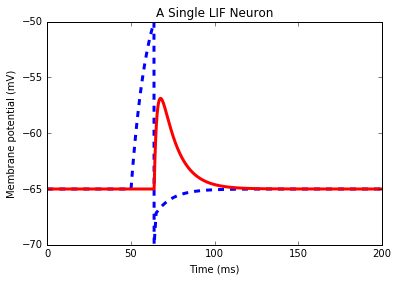

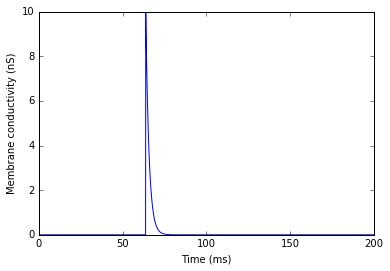

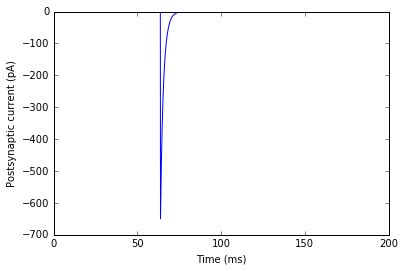

In [4]:
tau_decay = 2 * br.ms
E_syn = 0 * br.mV

run_synapse(input_current, tau_decay, E_syn)

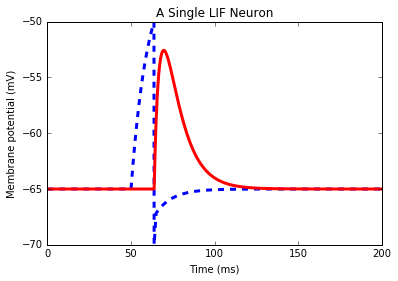

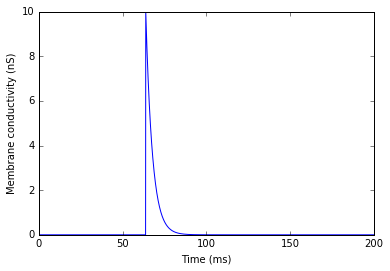

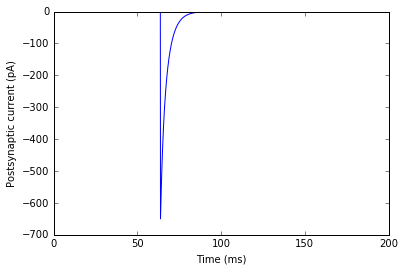

In [5]:
# increase rate of decay of gsyn
tau_decay = 4 * br.ms
E_syn = 0 * br.mV

run_synapse(input_current, tau_decay, E_syn)

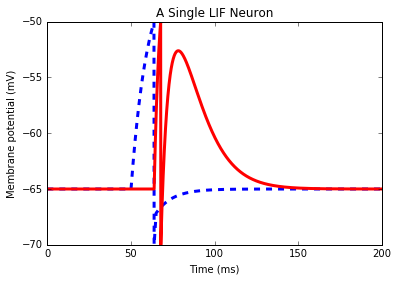

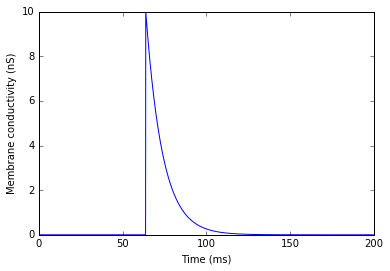

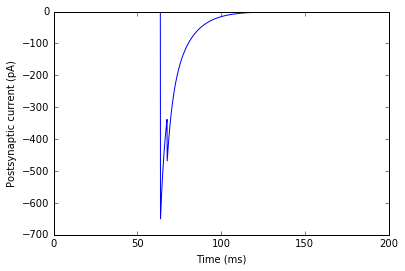

In [6]:
# decrease rate of decay of gsyn
# Increasing tau keeps synaptic channels open longer.
tau_decay = 10 * br.ms
E_syn = 0 * br.mV

run_synapse(input_current, tau_decay, E_syn)

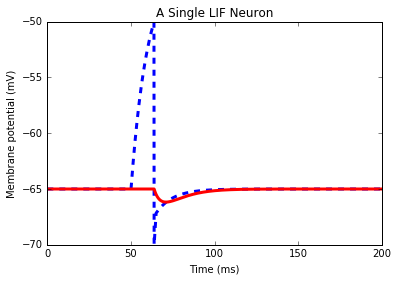

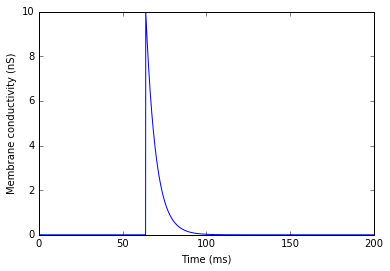

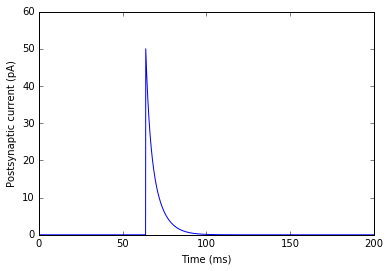

In [7]:
# make synapse inhibitory
tau_decay = 6 * br.ms
E_syn = -70 * br.mV

run_synapse(input_current, tau_decay, E_syn)

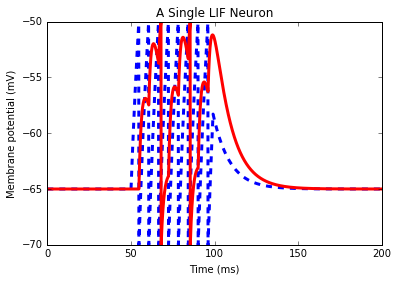

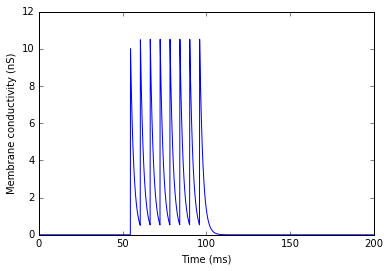

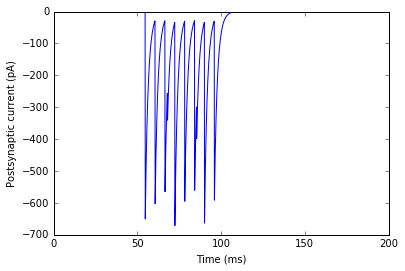

In [9]:
# Look at temporal integration of EPSPs
# create 200x2 array of zeros
# each column in this array will be input for a different neuron
input_current = np.zeros((200,2))
input_current[50:99, 0] = 400

# convert numpy array to timed array
input_current = br.TimedArray(input_current*br.pamp, dt=1*br.ms)

E_syn = 0 * br.mV
tau_decay = 2 * br.ms
run_synapse(input_current, tau_decay, E_syn)